# 24년도 주식 값 예측

In [1]:
from pycaret.classification import load_model 
from pycaret.time_series import TSForecastingExperiment

arima_model = load_model('auto_arima')

Transformation Pipeline and Model Successfully Loaded


In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.DataFrame([arima_model.get_params()]).T.reset_index()

,index,0
0,steps,"[(forecaster, (ForecastingPipeline(steps=[Colu..."
1,forecaster,(((ForecastingPipeline(steps=[ColumnSelect(col...
2,forecaster__steps,"[(model, (ForecastingPipeline(steps=[('ColumnS..."
3,forecaster__model,"(((ForecastingPipeline(steps=[('ColumnSelect',..."
4,forecaster__model__steps,"[(forecaster, (ForecastingPipeline(steps=[Colu..."
5,forecaster__model__forecaster,(((ForecastingPipeline(steps=[ColumnSelect(col...
6,forecaster__model__forecaster__steps,"[(model, AutoARIMA(random_state=1, sp=13, supp..."
7,forecaster__model__forecaster__model,"AutoARIMA(random_state=1, sp=13, suppress_warn..."
8,forecaster__model__forecaster__model__D,None
9,forecaster__model__forecaster__model__alpha,0.05


In [4]:
AAPL_data = pd.read_csv('new_data/AAPL_cleaned.csv')
AAPL_data

,Unnamed: 0,Close,Volume,CPI,USTS,DI,PP,IR,OP,CLF,EPU,GDP,UNEMP
0,2018-11-29,43.083508,167080000.0,252.594,3.03,116.1990,124267000.0,2.20,58.29,104047.0,183.21,61619.0,3.8
1,2018-11-30,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
2,2018-12-01,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
3,2018-12-02,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
4,2018-12-03,44.348064,163210000.0,252.767,2.98,115.9081,124163000.0,2.19,60.17,104131.0,158.49,61619.0,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,2023-09-25,175.848328,46172700.0,307.481,4.55,122.5803,129115000.0,5.33,94.01,106975.0,14.69,67083.0,3.8
1762,2023-09-26,171.733749,64588900.0,307.481,4.56,122.9224,129115000.0,5.33,94.46,106975.0,143.47,67083.0,3.8
1763,2023-09-27,170.205750,66921800.0,307.481,4.61,123.4153,129115000.0,5.33,97.10,106975.0,150.04,67083.0,3.8
1764,2023-09-28,170.465424,56294400.0,307.481,4.59,122.9827,129115000.0,5.33,96.64,106975.0,111.89,67083.0,3.8


In [5]:
AAPL_data.rename(columns = {'Unnamed: 0': 'Date'}, inplace = True)
AAPL_data

,Date,Close,Volume,CPI,USTS,DI,PP,IR,OP,CLF,EPU,GDP,UNEMP
0,2018-11-29,43.083508,167080000.0,252.594,3.03,116.1990,124267000.0,2.20,58.29,104047.0,183.21,61619.0,3.8
1,2018-11-30,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
2,2018-12-01,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
3,2018-12-02,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
4,2018-12-03,44.348064,163210000.0,252.767,2.98,115.9081,124163000.0,2.19,60.17,104131.0,158.49,61619.0,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,2023-09-25,175.848328,46172700.0,307.481,4.55,122.5803,129115000.0,5.33,94.01,106975.0,14.69,67083.0,3.8
1762,2023-09-26,171.733749,64588900.0,307.481,4.56,122.9224,129115000.0,5.33,94.46,106975.0,143.47,67083.0,3.8
1763,2023-09-27,170.205750,66921800.0,307.481,4.61,123.4153,129115000.0,5.33,97.10,106975.0,150.04,67083.0,3.8
1764,2023-09-28,170.465424,56294400.0,307.481,4.59,122.9827,129115000.0,5.33,96.64,106975.0,111.89,67083.0,3.8


In [6]:
# 모델 개수(test_value) 확인
len(arima_model.fh)

353

- 외생변수(독립변수)의 미래 예측 <br>
24년 주식 가격(close)을 예측하기 위해서 그에 해당하는 24년도의 외생변수 값이 필요함.<br>
외생변수의 미래값 예측 실행

In [7]:
print(AAPL_data.columns)
exog_vars = ['Volume', 'CPI', 'USTS', 'DI', 'PP', 'IR', 'OP', 'CLF', 'EPU', 'GDP', 'UNEMP']

Index(['Date', 'Close', 'Volume', 'CPI', 'USTS', 'DI', 'PP', 'IR', 'OP', 'CLF',
       'EPU', 'GDP', 'UNEMP'],
      dtype='object')


In [9]:
exog_exps = []
exog_models = []

for exog_var in exog_vars:
    # 외생변수에 대한 예측을 도출하기 위하여 시계열 실험 생성
    exog_exp = TSForecastingExperiment()
    # setup
    exog_exp.setup(
        data=AAPL_data[["Date", exog_var]],
        target=exog_var,
        index="Date",
        fh = len(arima_model.fh), # 이전 모델 개수만큼 예측 값 생성
        session_id=1,
        verbose=False,
    )

    # 사용자는 미래 외생 변수를 모델링하는 방법을 사용자 정의할 수 있습니다.
    # 즉, 모델링 시간이 늘어나는 대신 더 나은 모델을 얻을 수 있는 추가 단계와 모델을 추가할 수 있습니다.
    best = exog_exp.compare_models(
        sort="mase",
        include=[ # 선택한 모델로 학습
            "arima",
            "ets",
            "exp_smooth",
            "theta",
            "lightgbm_cds_dt",
        ],
        verbose=False, # Score가 표기되지 않음
    )
    final_exog_model = exog_exp.finalize_model(best)

    exog_exps.append(exog_exp)
    exog_models.append(final_exog_model)

In [10]:
# STEP 2: 외생 변수에 대한 미래 예측 얻기
future_exog = [
    exog_exp.predict_model(exog_model)
    for exog_exp, exog_model in zip(exog_exps, exog_models)
]

In [11]:
# 예측값 concat
future_exog = pd.concat(future_exog, axis=1)
future_exog.columns = exog_vars

In [12]:
# 예측으로 도출한 외생변수 집합 확인
future_exog

,Volume,CPI,USTS,DI,PP,IR,OP,CLF,EPU,GDP,UNEMP
2023-09-30,5.322453e+07,307.5774,4.5899,122.7774,1.291179e+08,5.3308,96.3523,106972.6793,96.8826,67074.9780,3.8057
2023-10-01,5.318149e+07,307.6127,4.5897,122.7700,1.291182e+08,5.3317,96.1637,106969.4003,73.1899,67066.9766,3.8113
2023-10-02,5.180158e+07,307.6113,4.6003,122.7821,1.291429e+08,5.3325,95.9838,106972.7594,103.9990,67058.9959,3.8170
2023-10-03,5.559348e+07,307.6098,4.6092,122.7636,1.291406e+08,5.3333,95.9323,106975.8943,112.8728,67051.0357,3.8225
2023-10-04,5.341117e+07,307.6083,4.6075,122.7793,1.291401e+08,5.3341,97.3786,106976.7643,140.8406,67043.0961,3.8281
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-12,4.630606e+07,318.9917,4.8103,124.0749,1.304347e+08,5.8412,103.8524,107105.6299,105.5329,65235.3495,4.6325
2024-09-13,5.223828e+07,319.0716,4.8092,124.0674,1.304376e+08,5.8431,106.3679,107101.2575,41.7866,65232.0911,4.6332
2024-09-14,5.223001e+07,319.1027,4.8084,124.0796,1.304385e+08,5.8450,105.7891,107117.7918,41.7525,65228.8411,4.6339
2024-09-15,5.224963e+07,319.2045,4.8082,124.0608,1.304387e+08,5.8469,104.8958,107108.1869,41.7319,65225.5995,4.6346


<AxesSubplot: >

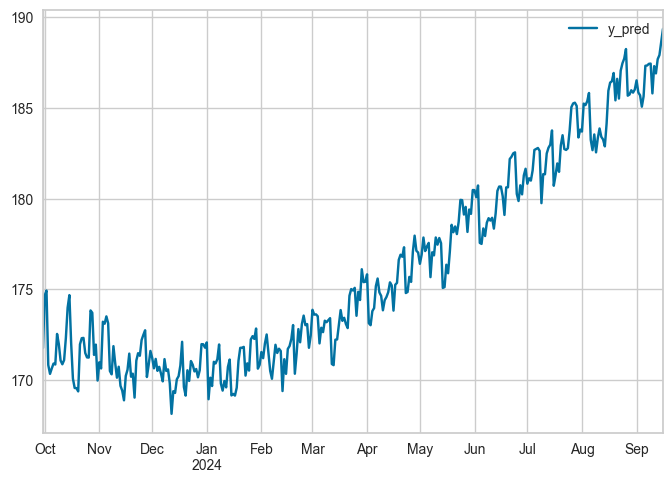

In [13]:
# 미래 예측용 시계열 실험 생성
exp_future = TSForecastingExperiment()


future_preds = exp_future.predict_model(
    arima_model,  # 모델 입력
    X=future_exog,  # 외생변수 입력
)

# 결과 시각화
future_preds.plot()

In [14]:
future_preds

,y_pred
2023-09-30,171.7724
2023-10-01,174.6713
2023-10-02,174.9400
2023-10-03,170.8372
2023-10-04,170.3476
...,...
2024-09-12,186.9145
2024-09-13,187.6971
2024-09-14,187.9265
2024-09-15,188.6660


In [ ]:
AAPL_data

,Date,Close,Volume,CPI,USTS,DI,PP,IR,OP,CLF,EPU,GDP,UNEMP
0,2018-11-29,43.083508,167080000.0,252.594,3.03,116.1990,124267000.0,2.20,58.29,104047.0,183.21,61619.0,3.8
1,2018-11-30,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
2,2018-12-01,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
3,2018-12-02,42.850754,158126000.0,252.594,3.01,116.4157,124267000.0,2.20,57.71,104047.0,136.43,61619.0,3.8
4,2018-12-03,44.348064,163210000.0,252.767,2.98,115.9081,124163000.0,2.19,60.17,104131.0,158.49,61619.0,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,2023-09-25,175.848328,46172700.0,307.481,4.55,122.5803,129115000.0,5.33,94.01,106975.0,14.69,67083.0,3.8
1762,2023-09-26,171.733749,64588900.0,307.481,4.56,122.9224,129115000.0,5.33,94.46,106975.0,143.47,67083.0,3.8
1763,2023-09-27,170.205750,66921800.0,307.481,4.61,123.4153,129115000.0,5.33,97.10,106975.0,150.04,67083.0,3.8
1764,2023-09-28,170.465424,56294400.0,307.481,4.59,122.9827,129115000.0,5.33,96.64,106975.0,111.89,67083.0,3.8
